# 단순 선형 회귀
## 1. 패키지 준비

In [1]:
import sys
sys.path.append('../../')
import helper

from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.model_selection import train_test_split # 데이터를 훈련용과 테스트용으로 나누는 기능
from tensorflow.keras.models import Sequential       # 순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.layers import Dense            # 모델 객체에 학습층을 쌓기 위한 클래스

## 2. 데이터셋 준비

In [2]:
origin = read_excel('https://data.hossam.kr/E04/cars.xlsx')
origin.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


## 3. 데이터 전처리
- 결측치 확인

In [3]:
origin.isna().sum()

speed    0
dist     0
dtype: int64

> 결측치 없음

## 4. 탐색적 데이터 분석
- 기본 통계 확인

In [4]:
origin.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


- boxplot 확인

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


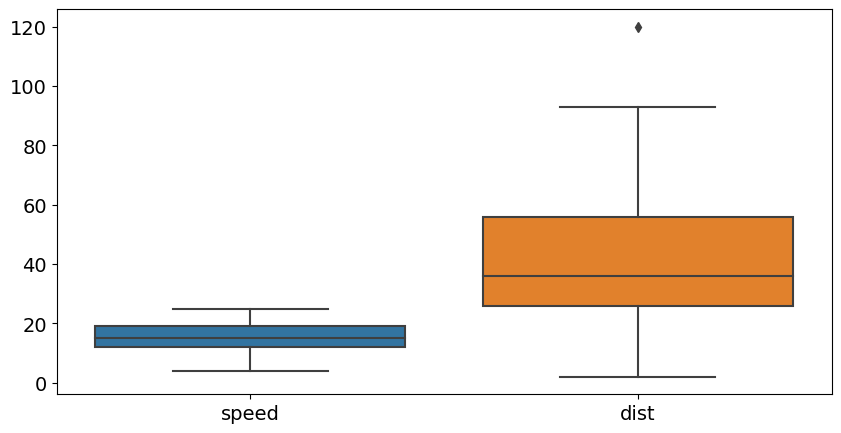

In [5]:
plt.figure(figsize = (10, 5))
sb.boxplot(data=origin)
plt.show()
plt.close()

- 산점도 그래프와 추세선 확인

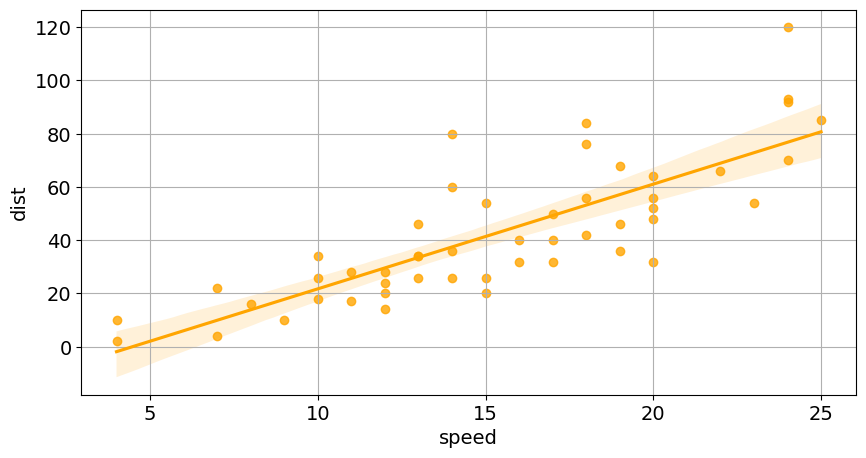

In [6]:
plt.figure(figsize = (10, 5))
sb.regplot(data=origin,
           x='speed',
           y='dist',
           color= 'orange')
plt.grid()
plt.show()
plt.close()

> 산점도 그래프와 추세선을 확인하는 이유: 단순 선형 회귀 모델로 가야할지, 다항식으로 가야되는지 결정하기 위함
> 
> 즉, 머신러닝을 하기 전에 변수들의 `차수를 결정`하기 위해서이다
> 
> 곡선(-> 다항식)보다는 `선형분포`에 더 가까우므로 `단순선형회귀모델`을 적용하기로 결정

## 5. 데이터셋 분할
- 랜덤 시드 고정

In [7]:
np.random.seed(777)

- 훈련 데이터(독립변수)와 레이블(종속변수) 구분하기

In [8]:
x = origin.drop(['dist'], axis=1)
y = origin['dist']
    # series 형태로 되어있다
    # 레이블(종속변수)는 series 형태이든 dataframe 형탸이든 상관 없다
print('훈련데이터 크기:', x.shape, ' / 레이블 크기:', y.shape)

훈련데이터 크기: (50, 1)  / 레이블 크기: (50,)


- 훈련 데이터와 검증 데이터로 분할

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=777)

print('훈련용 데이터셋 크기: %d, 검증용 데이터셋 크기: %d' % (len(x_train), len(x_test)))

훈련용 데이터셋 크기: 35, 검증용 데이터셋 크기: 15


## 6. (학습 )모델 개발
- 모델 정의

In [10]:
my_model = Sequential()

# 1차원의 데이터를 입력으로 받고, 32개의 출력을 가지는 첫 번째 Dense층
my_model.add(Dense(32, 
                   activation = 'relu',     # 첫번째 층에서는 뭐 할지 모르겠으면 relu! 웬만하면 다 relu다
                   input_shape = (1,)))
# 하나의 값을 출력
# -> 정답의 범위가 정해지지 않기 때문에 확성화 함수는 linear
# -> linear는 기본값이므로 생략 가능함
my_model.add(Dense(1, activation='linear'))
    # activation = 'linear'을 통해 단순선형회귀임을 명시

my_model.compile(optimizer = 'adam',
                 loss = 'mse',
                 metrics = ['mae'])
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 학습하기
    - `hist.history`
        - loss = 훈련 데이터 손실률
        - mae = 훈련 절대오차
        - val_loss = 검증 데이터 손실률
        - val_mae = 검증 절대오차

In [12]:
result = my_model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test))

# 학습 결과
result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/500
2/2 [==============================] - 0s 116ms/step - loss: 2749.4622 - mae: 45.0357 - val_loss: 1920.3444 - val_mae: 38.2466
Epoch 2/500
2/2 [==============================] - 0s 20ms/step - loss: 2731.3867 - mae: 44.8671 - val_loss: 1907.4938 - val_mae: 38.0972
Epoch 3/500
2/2 [==============================] - 0s 20ms/step - loss: 2714.4700 - mae: 44.6998 - val_loss: 1894.2560 - val_mae: 37.9427
Epoch 4/500
2/2 [==============================] - 0s 21ms/step - loss: 2696.9573 - mae: 44.5306 - val_loss: 1881.1714 - val_mae: 37.7894
Epoch 5/500
2/2 [==============================] - 0s 20ms/step - loss: 2678.9360 - mae: 44.3581 - val_loss: 1868.1145 - val_mae: 37.6357
Epoch 6/500
2/2 [==============================] - 0s 20ms/step - loss: 2661.4075 - mae: 44.1870 - val_loss: 1854.8542 - val_mae: 37.4791
Epoch 7/500
2/2 [==============================] - 0s 20ms/step - loss: 2643.6465 - mae: 44.0127 - val_loss: 1841.5898 - val_mae: 37.3218
Epoch 8/500
2/2 [================

,loss,mae,val_loss,val_mae
epochs,,,,
1,2749.462158,45.035744,1920.344360,38.246582
2,2731.386719,44.867126,1907.493774,38.097179
3,2714.469971,44.699844,1894.255981,37.942680
4,2696.957275,44.530575,1881.171387,37.789360
5,2678.936035,44.358135,1868.114502,37.635746
...,...,...,...,...
496,271.344696,12.931083,248.243744,12.903833
497,271.281586,12.932805,248.534805,12.927141
498,271.213745,12.934628,248.709564,12.941076


## 7. 학습 결과 평가
- 학습 결과 시각화

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning

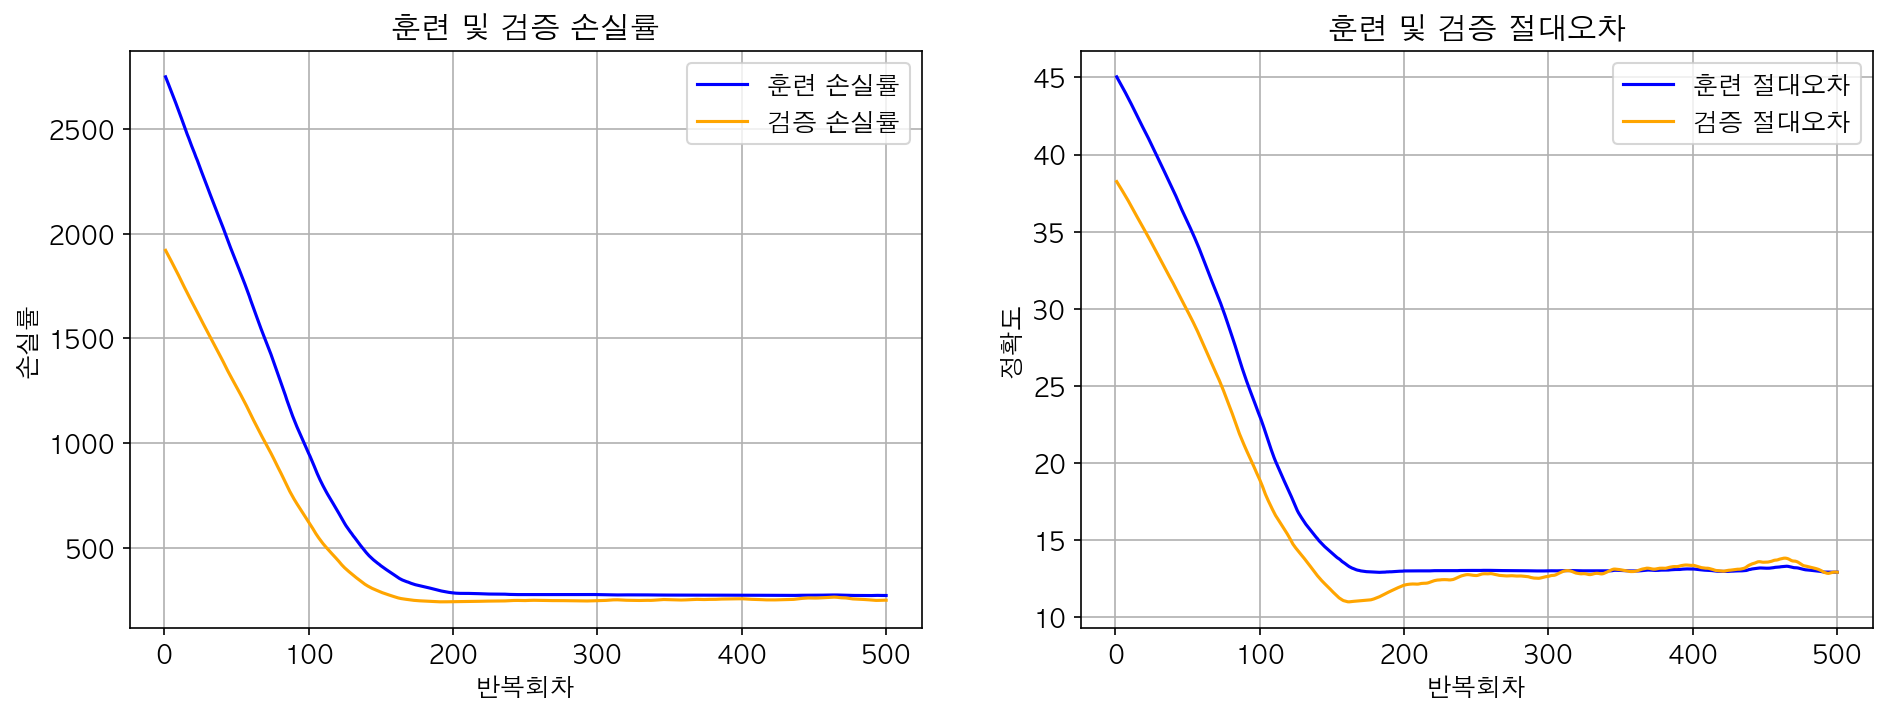

In [13]:
# 그래프 기본 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
sb.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sb.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
sb.lineplot(x=result_df.index, y='mae', data=result_df, color='blue', label='훈련 절대오차', ax=ax2)
sb.lineplot(x=result_df.index, y='val_mae', data=result_df, color='orange', label='검증 절대오차', ax=ax2)
ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

> 위의 그래프를 보면 훈련 데이터의 손실률과 검증 데이터의 손실률의 차이가 점점 줄어들고 있고, 둘 다 낮아지고 있다
>
> 절대오차도 마찬가지 
>
> 둘의 차이가 줄어드는 것 --> 좋은 것
>
> 만약, 둘의 차이가 줄어들지 않고 벌어지고 있으면 `과적합`이 발생한 것
>
> 과적합일 때에는 `데이터를 추가`하거나 `데이터 표준화`를 해야 된다.

- 모델 성능 평가

In [ ]:
evaluate1 = my_model.evaluate(x_train, y_train)
print('최종 훈련 손실룰: %f, 최종 훈련 절대오차: %f' % (evaluate1[0], evaluate1[1]))

evaluate2 = my_model.evaluate(x_test, y_test)
print('최종 검증 손실률: %f, 최종 검증 절대오차: %f' % (evaluate2[0], evaluate2[1]))

2/2 [==============================] - 0s 2ms/step - loss: 273.3595 - mae: 13.3087
최종 훈련 손실룰: 273.359528, 최종 훈련 절대오차: 13.308743
1/1 [==============================] - 0s 16ms/step - loss: 263.1225 - mae: 13.8320
최종 검증 손실률: 263.122528, 최종 검증 절대오차: 13.832036


> 여기서 손실률과 절대오차는 백분율이 아니라 `값의 차이`를 뜻한다.
> 훈련과 검증의 손실률과 절대오차의 차이가 점점 줄어든다면 위의 값 (최종 손실률/절대오차)는 크게 신경 쓰지 않아도 됨

## 8. 학습 결과 적용
- 테스트 데이터에 대한 `예측 결과 산정`

In [ ]:
results = my_model.predict(x_test)
print(results)

1/1 [==============================] - 0s 52ms/step
[[69.72283 ]
 [40.060905]
 [37.09472 ]
 [34.128525]
 [57.858063]
 [43.0271  ]
 [43.0271  ]
 [54.89187 ]
 [37.09472 ]
 [57.858063]
 [43.0271  ]
 [60.824253]
 [22.263754]
 [40.060905]
 [13.365178]]


- `결과 데이터셋 구성`

In [ ]:
kdf = DataFrame({'검증데이터': x_test['speed'],
                 '실제값': y_test,
                 '예측값': results.flatten()})

kdf['예측오차'] = kdf['실제값'] - kdf['예측값']
kdf

,검증데이터,실제값,예측값,예측오차
44,23,54,69.722832,-15.722832
17,13,34,40.060905,-6.060905
11,12,14,37.094719,-23.094719
9,11,17,34.128525,-17.128525
36,19,46,57.858063,-11.858063
21,14,60,43.027100,16.972900
22,14,80,43.027100,36.972900
31,18,42,54.891869,-12.891869
12,12,20,37.094719,-17.094719
37,19,68,57.858063,10.141937


- `실제 결과값`과 `머신러닝에 의한 예측값` 비교

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

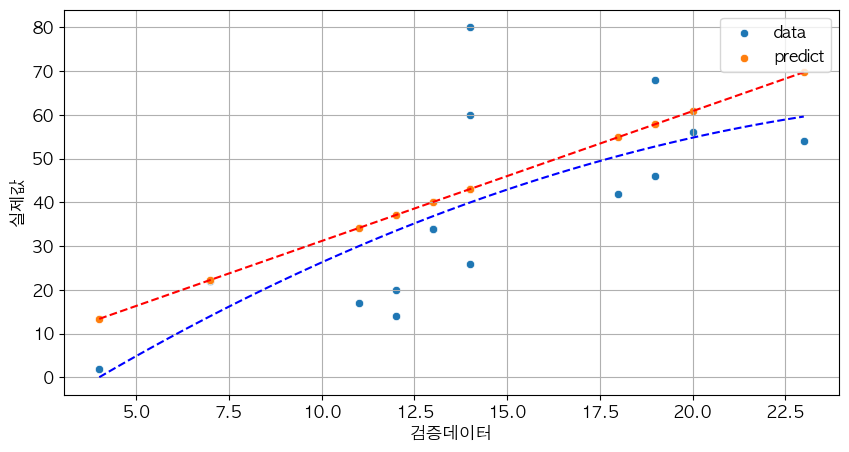

In [ ]:
helper.regplot(x_left=kdf['검증데이터'],
               y_left=kdf['실제값'],
               y_left_pred=kdf['예측값'])

- `임의의 값`에 대한 `머신러닝 예측 결과`

> 통계의 목적은 각종 경향(trend)를 설명하는 것이기에 결과값에 어떤 경향을 설명할 수 있는 지표들이 많다
>
> 반면 머신러닝의 목적은 predict()함수로 `예측하는 것`이다!
> 미래의 어떤 결과 값을 예측하는 것이 목적이기에 중간중간에 들어가는 지표 같은 것들 1도 안 주고 우리가 직접 만들어내야 된다 (scikitlearn 활용하여 tensorflow에도 적용할 수 있다)

In [ ]:
my_speed = 50
results = my_model.predict([[my_speed]])
print('속도가 %d인 자동차의 제동거리는 %d로 예상됩니다.' % (my_speed, results))

1/1 [==============================] - 0s 28ms/step
속도가 50인 자동차의 제동거리는 149로 예상됩니다.


/var/folders/md/0jpjv9rd2qg156cjt56sczy80000gn/T/ipykernel_2842/2731861476.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('속도가 %d인 자동차의 제동거리는 %d로 예상됩니다.' % (my_speed, results))
